# Final Project (by Matias Burmicky)

### `Question to work on`

In this exercise, I would like to predict which customer are likely to churn and their churn score. Then understand for those staying, what initiatives can be built to retain them in the future

### `About the data sets`

***`Data sets collected manually`***

***Overall*** 

The data sets are about a fictional telecom company that has information about their customers, and if they have churned or not based on a variety of possible factors. 

They are a total of 5 data sets:
- Telco_customer_churn_demographics.xlsx
- Telco_customer_churn_location.xlsx
- Telco_customer_churn_population.xlsx
- Telco_customer_churn_services.xlsx
- Telco_customer_churn_status.xlsx

***Source:*** IBM community (1), through Kaggle community (2)

(1) ***Source:*** [IBM community](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

(2) ***Source:*** [Kaggle community](https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113/data?select=Telco_customer_churn_status.xlsx)

In [1]:
#Importing initial libraries
import pandas as pd
import numpy as np

#To display all columns
pd.set_option('display.max_columns', None)

***`Demographics (table description)`***
- **CustomerID:** A unique ID that identifies each customer.
- **Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time the fiscal quarter ended.
- **Senior Citizen:** Indicates if the customer is 65 or older: Yes, No
- **Married:** Indicates if the customer is married: Yes, No
- **Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- **Number of Dependents:** Indicates the number of dependents that live with the customer.

In [2]:
demographic = pd.read_excel('Telco_customer_churn_demographics.xlsx')
demographic

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Female,30,No,No,No,No,0
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2


***`Location`***
- **CustomerID:** A unique ID that identifies each customer.
- **Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Country:** The country of the customer’s primary residence.
- **State:** The state of the customer’s primary residence.
- **City:** The city of the customer’s primary residence.
- **Zip Code:** The zip code of the customer’s primary residence.
- **Lat Long:** The combined latitude and longitude of the customer’s primary residence.
- **Latitude:** The latitude of the customer’s primary residence.
- **Longitude:** The longitude of the customer’s primary residence.

In [3]:
location = pd.read_excel('Telco_customer_churn_location.xlsx')
location

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330


***`Population`***
- **ID:** A unique ID that identifies each row.
- **Zip Code:** The zip code of the customer’s primary residence.
- **Population:** A current population estimate for the entire Zip Code area.

In [4]:
population = pd.read_excel('Telco_customer_churn_population.xlsx')
population

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019
...,...,...,...
1666,1667,96145,4002
1667,1668,96146,942
1668,1669,96148,678
1669,1670,96150,33038


***`Services`***
- **CustomerID:** A unique ID that identifies each customer.
- **Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Quarter:** The fiscal quarter that the data has been derived from (e.g. Q3).
- **Referred a Friend:** Indicates if the customer has ever referred a friend or family member to this company: Yes, No
- **Number of Referrals:** Indicates the number of referrals to date that the customer has made.
- **Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- **Offer:** Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.
- **Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No
- **Avg Monthly Long Distance Charges:** Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.
- **Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- **Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- **Avg Monthly GB Download:** Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above.
- **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- **Device Protection Plan:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- **Premium Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Music:** Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Unlimited Data:** Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No
- **Contract: Indicates the customer’s current contract type:** Month-to-Month, One Year, Two Year.
- **Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No
- **Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- **Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.
- **Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- **Total Refunds:** Indicates the customer’s total refunds, calculated to the end of the quarter specified above.
- **Total Extra Data Charges:** Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.
- **Total Long Distance Charges:** Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above.

In [5]:
services = pd.read_excel('Telco_customer_churn_services.xlsx')
services

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,No,0,72,NaN,Yes,22.77,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,2234-XADUH,1,Q3,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,4801-JZAZL,1,Q3,Yes,1,11,NaN,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


***`Status`***
- **CustomerID:** A unique ID that identifies each customer.
- **Count:**  A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Quarter:**  The fiscal quarter that the data has been derived from (e.g. Q3).
- **Satisfaction Score:**  A customer’s overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied).
- **Satisfaction Score Label:**  Indicates the text version of the score (1-5) as a text string.
- **Customer Status:**  Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined
- **Churn Label:**  Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
- **Churn Value:**  1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
- **Churn Score:**  A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
- **Churn Score Category:**  A calculation that assigns a Churn Score to one of the following categories: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, and 91-100
- **CLTV:**  Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
- **CLTV Category:**  A calculation that assigns a CLTV value to one of the following categories: 2000-2500, 2501-3000, 3001-3500, 3501-4000, 4001-4500, 4501-5000, 5001-5500, 5501-6000, 6001-6500, and 6501-7000.
- **Churn Category:**  A high-level category for the customer’s reason for churning: Attitude, Competitor, Dissatisfaction, Other, Price. When they leave the company, all customers are asked about their reasons for leaving. Directly related to Churn Reason.
- **Churn Reason:**  A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [6]:
status = pd.read_excel('Telco_customer_churn_status.xlsx')
status

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN


***`Data sets collected through an API or web scraping`***

**Demographics data**
- California Median Household Income and population per Zip Code
- Median calculation from the following annual periods: 2010-2014
- Data collected by ACS (American Community Survey) 
- Source: United States Census Bureau through `USA.com` [access here](http://www.usa.com/rank/california-state--median-household-income--zip-code-rank.htm?hl=&hlst=&wist=&yr=9000&dis=&sb=DESC&plow=&phigh=&ps=)


In [7]:
#Importing BeautifulSoup and requests for web scrapping
from bs4 import BeautifulSoup
import requests

In [8]:
# body > div.container > div > div:nth-child(4) > div > div.panel.panel-default.panel-prefixes

In [9]:
#This to scrape county (if I have time, will do it)
#tblZIP > tbody

In [10]:
#Inserting url with information source and checking status
url = "http://www.usa.com/rank/california-state--median-household-income--zip-code-rank.htm?hl=&hlst=&wist=&yr=9000&dis=&sb=DESC&plow=&phigh=&ps="
response = requests.get(url)
#Checking result (200 is positive)
response.status_code

200

In [11]:
# Parsing html (creating the 'soup')
response.content
soup = BeautifulSoup(response.content, "html.parser")
#Selecting table from web, and extracting Median Household Income and Zip code from table
extraction = soup.select("table")[1].get_text().split(".")
extraction

['RankMedian Household Income ▼Zip / Population1',
 '$236,91294027 / 7,230\n2',
 '$228,58792145 / 1,968\n3',
 '$200,32591980 / 631\n4',
 '$187,85794957 / 1,063\n5',
 '$182,75094022 / 19,737\n6',
 '$180,17494028 / 6,720\n7',
 '$176,24194506 / 21,896\n8',
 '$172,44390077 / 8,328\n9',
 '$170,65694105 / 6,282\n10',
 '$167,54694024 / 22,573\n11',
 '$167,38695070 / 31,093\n12',
 '$166,75095140 / 233\n13',
 '$166,14794563 / 18,284\n14',
 '$163,48692657 / 9,751\n15',
 '$163,21994507 / 15,973\n16',
 '$162,32894528 / 915\n17',
 '$157,93890272 / 23,497\n18',
 '$157,87991210 / 614\n19',
 '$156,25090274 / 25,482\n20',
 '$154,10795030 / 13,429\n21',
 '$153,26994074 / 320\n22',
 '$152,72195120 / 37,673\n23',
 '$152,21091011 / 20,671\n24',
 '$150,86492861 / 5,911\n25',
 '$149,82195007 / 727\n26',
 '$149,53892679 / 32,822\n27',
 '$147,56894037 / 2,880\n28',
 '$145,61094708 / 11,143\n29',
 '$145,50595138 / 19,136\n30',
 '$144,88694129 / 3,334\n31',
 '$144,15294539 / 51,459\n32',
 '$142,07190266 / 35,534

In [12]:
#Collecting Median Household Income and Zipcode in a list named "income_zcode"
income_zcode = []
for ele in extraction:
    first = ele.split("/")[0]
    income_zcode.append(first)

#Dropping first element of list
income_zcode = income_zcode[1:]    
print(len(income_zcode))  
income_zcode

1686


['$236,91294027 ',
 '$228,58792145 ',
 '$200,32591980 ',
 '$187,85794957 ',
 '$182,75094022 ',
 '$180,17494028 ',
 '$176,24194506 ',
 '$172,44390077 ',
 '$170,65694105 ',
 '$167,54694024 ',
 '$167,38695070 ',
 '$166,75095140 ',
 '$166,14794563 ',
 '$163,48692657 ',
 '$163,21994507 ',
 '$162,32894528 ',
 '$157,93890272 ',
 '$157,87991210 ',
 '$156,25090274 ',
 '$154,10795030 ',
 '$153,26994074 ',
 '$152,72195120 ',
 '$152,21091011 ',
 '$150,86492861 ',
 '$149,82195007 ',
 '$149,53892679 ',
 '$147,56894037 ',
 '$145,61094708 ',
 '$145,50595138 ',
 '$144,88694129 ',
 '$144,15294539 ',
 '$142,07190266 ',
 '$138,75090210 ',
 '$138,37194582 ',
 '$137,34494549 ',
 '$137,12292694 ',
 '$136,33194707 ',
 '$135,07696136 ',
 '$134,90794301 ',
 '$133,33395053 ',
 '$133,08894556 ',
 '$132,82694552 ',
 '$132,48694920 ',
 '$132,46294065 ',
 '$131,60790402 ',
 '$131,16692130 ',
 '$131,10894127 ',
 '$130,96195014 ',
 '$128,80294526 ',
 '$128,65495135 ',
 '$128,06091436 ',
 '$127,68494588 ',
 '$126,98492

In [13]:
#Collecting zip codes in a single lists
zip_codes = []
for ele in income_zcode:
    #Collecting zip code digits
    zip = ele[-6:]
    zip_codes.append(zip)

print(len(zip_codes))
display(zip_codes)

1686


['94027 ',
 '92145 ',
 '91980 ',
 '94957 ',
 '94022 ',
 '94028 ',
 '94506 ',
 '90077 ',
 '94105 ',
 '94024 ',
 '95070 ',
 '95140 ',
 '94563 ',
 '92657 ',
 '94507 ',
 '94528 ',
 '90272 ',
 '91210 ',
 '90274 ',
 '95030 ',
 '94074 ',
 '95120 ',
 '91011 ',
 '92861 ',
 '95007 ',
 '92679 ',
 '94037 ',
 '94708 ',
 '95138 ',
 '94129 ',
 '94539 ',
 '90266 ',
 '90210 ',
 '94582 ',
 '94549 ',
 '92694 ',
 '94707 ',
 '96136 ',
 '94301 ',
 '95053 ',
 '94556 ',
 '94552 ',
 '94920 ',
 '94065 ',
 '90402 ',
 '92130 ',
 '94127 ',
 '95014 ',
 '94526 ',
 '95135 ',
 '91436 ',
 '94588 ',
 '92887 ',
 '94062 ',
 '95033 ',
 '92625 ',
 '92673 ',
 '94070 ',
 '93108 ',
 '90265 ',
 '92823 ',
 '95663 ',
 '94618 ',
 '92127 ',
 '94114 ',
 '94087 ',
 '94583 ',
 '91302 ',
 '94517 ',
 '94598 ',
 '94941 ',
 '94123 ',
 '92610 ',
 '95032 ',
 '90275 ',
 '92603 ',
 '93730 ',
 '94107 ',
 '94566 ',
 '95041 ',
 '91108 ',
 '92067 ',
 '92131 ',
 '94025 ',
 '95746 ',
 '91708 ',
 '94010 ',
 '95762 ',
 '91377 ',
 '95054 ',
 '90049 ',

In [14]:
#Collecting Median Household Income in a single list
income = []
for ele in income_zcode:
    inc = ele[:-6]
    income.append(inc)
print(len(income))    
income

1686


['$236,912',
 '$228,587',
 '$200,325',
 '$187,857',
 '$182,750',
 '$180,174',
 '$176,241',
 '$172,443',
 '$170,656',
 '$167,546',
 '$167,386',
 '$166,750',
 '$166,147',
 '$163,486',
 '$163,219',
 '$162,328',
 '$157,938',
 '$157,879',
 '$156,250',
 '$154,107',
 '$153,269',
 '$152,721',
 '$152,210',
 '$150,864',
 '$149,821',
 '$149,538',
 '$147,568',
 '$145,610',
 '$145,505',
 '$144,886',
 '$144,152',
 '$142,071',
 '$138,750',
 '$138,371',
 '$137,344',
 '$137,122',
 '$136,331',
 '$135,076',
 '$134,907',
 '$133,333',
 '$133,088',
 '$132,826',
 '$132,486',
 '$132,462',
 '$131,607',
 '$131,166',
 '$131,108',
 '$130,961',
 '$128,802',
 '$128,654',
 '$128,060',
 '$127,684',
 '$126,984',
 '$126,557',
 '$126,397',
 '$125,735',
 '$125,629',
 '$125,335',
 '$125,272',
 '$124,814',
 '$124,712',
 '$124,375',
 '$123,575',
 '$123,459',
 '$122,970',
 '$122,354',
 '$121,948',
 '$121,715',
 '$121,367',
 '$121,337',
 '$121,209',
 '$121,200',
 '$120,984',
 '$120,893',
 '$120,742',
 '$120,686',
 '$120,672',

In [15]:
#Eliminating special characters from Median Household Income
import re
median_income = []
for ele in income:
    inc = re.sub(r'\W+', '',ele)
    median_income.append(inc)
print(len(median_income))
median_income

1686


['236912',
 '228587',
 '200325',
 '187857',
 '182750',
 '180174',
 '176241',
 '172443',
 '170656',
 '167546',
 '167386',
 '166750',
 '166147',
 '163486',
 '163219',
 '162328',
 '157938',
 '157879',
 '156250',
 '154107',
 '153269',
 '152721',
 '152210',
 '150864',
 '149821',
 '149538',
 '147568',
 '145610',
 '145505',
 '144886',
 '144152',
 '142071',
 '138750',
 '138371',
 '137344',
 '137122',
 '136331',
 '135076',
 '134907',
 '133333',
 '133088',
 '132826',
 '132486',
 '132462',
 '131607',
 '131166',
 '131108',
 '130961',
 '128802',
 '128654',
 '128060',
 '127684',
 '126984',
 '126557',
 '126397',
 '125735',
 '125629',
 '125335',
 '125272',
 '124814',
 '124712',
 '124375',
 '123575',
 '123459',
 '122970',
 '122354',
 '121948',
 '121715',
 '121367',
 '121337',
 '121209',
 '121200',
 '120984',
 '120893',
 '120742',
 '120686',
 '120672',
 '120610',
 '120401',
 '120208',
 '120152',
 '119939',
 '119924',
 '119095',
 '118919',
 '118750',
 '118125',
 '117700',
 '117326',
 '116855',
 '116732',

In [16]:
#Collecting Population in a list named "population"
population1 = []
for ele in extraction:
    first = ele.split("/")[1]
    population1.append(first)
#Dropping first element of list
population1 = population1[1:]
print(len(population1))  
population1

1686


[' 7,230\n2',
 ' 1,968\n3',
 ' 631\n4',
 ' 1,063\n5',
 ' 19,737\n6',
 ' 6,720\n7',
 ' 21,896\n8',
 ' 8,328\n9',
 ' 6,282\n10',
 ' 22,573\n11',
 ' 31,093\n12',
 ' 233\n13',
 ' 18,284\n14',
 ' 9,751\n15',
 ' 15,973\n16',
 ' 915\n17',
 ' 23,497\n18',
 ' 614\n19',
 ' 25,482\n20',
 ' 13,429\n21',
 ' 320\n22',
 ' 37,673\n23',
 ' 20,671\n24',
 ' 5,911\n25',
 ' 727\n26',
 ' 32,822\n27',
 ' 2,880\n28',
 ' 11,143\n29',
 ' 19,136\n30',
 ' 3,334\n31',
 ' 51,459\n32',
 ' 35,534\n33',
 ' 21,478\n34',
 ' 39,721\n35',
 ' 28,298\n36',
 ' 24,568\n37',
 ' 12,402\n38',
 ' 135\n39',
 ' 16,927\n40',
 ' 2,730\n41',
 ' 15,505\n42',
 ' 15,209\n43',
 ' 12,583\n44',
 ' 11,585\n45',
 ' 11,503\n46',
 ' 50,280\n47',
 ' 19,356\n48',
 ' 62,478\n49',
 ' 32,274\n50',
 ' 21,349\n51',
 ' 14,563\n52',
 ' 31,910\n53',
 ' 20,071\n54',
 ' 27,014\n55',
 ' 9,628\n56',
 ' 12,572\n57',
 ' 29,875\n58',
 ' 29,879\n59',
 ' 12,119\n60',
 ' 17,660\n61',
 ' 2,960\n62',
 ' 2,485\n63',
 ' 17,007\n64',
 ' 41,900\n65',
 ' 32,229\n66',
 ' 

In [17]:
#Collecting Population in a list named "population"
population2 = []
for ele in population1:
    first = ele.split("\n")[0]
    population2.append(first)
print(len(population2))  
population2

1686


[' 7,230',
 ' 1,968',
 ' 631',
 ' 1,063',
 ' 19,737',
 ' 6,720',
 ' 21,896',
 ' 8,328',
 ' 6,282',
 ' 22,573',
 ' 31,093',
 ' 233',
 ' 18,284',
 ' 9,751',
 ' 15,973',
 ' 915',
 ' 23,497',
 ' 614',
 ' 25,482',
 ' 13,429',
 ' 320',
 ' 37,673',
 ' 20,671',
 ' 5,911',
 ' 727',
 ' 32,822',
 ' 2,880',
 ' 11,143',
 ' 19,136',
 ' 3,334',
 ' 51,459',
 ' 35,534',
 ' 21,478',
 ' 39,721',
 ' 28,298',
 ' 24,568',
 ' 12,402',
 ' 135',
 ' 16,927',
 ' 2,730',
 ' 15,505',
 ' 15,209',
 ' 12,583',
 ' 11,585',
 ' 11,503',
 ' 50,280',
 ' 19,356',
 ' 62,478',
 ' 32,274',
 ' 21,349',
 ' 14,563',
 ' 31,910',
 ' 20,071',
 ' 27,014',
 ' 9,628',
 ' 12,572',
 ' 29,875',
 ' 29,879',
 ' 12,119',
 ' 17,660',
 ' 2,960',
 ' 2,485',
 ' 17,007',
 ' 41,900',
 ' 32,229',
 ' 55,229',
 ' 35,272',
 ' 25,165',
 ' 12,781',
 ' 26,974',
 ' 30,605',
 ' 25,528',
 ' 11,799',
 ' 25,898',
 ' 42,420',
 ' 20,173',
 ' 10,137',
 ' 27,792',
 ' 42,523',
 ' 146',
 ' 13,613',
 ' 9,020',
 ' 33,868',
 ' 40,945',
 ' 23,715',
 ' 3,447',
 ' 42,22

In [18]:
#Eliminating special characters
population3 = []
for ele in population2:
    pop = re.sub(r'\W+', '',ele)
    population3.append(pop)
print(len(population3))
population3

1686


['7230',
 '1968',
 '631',
 '1063',
 '19737',
 '6720',
 '21896',
 '8328',
 '6282',
 '22573',
 '31093',
 '233',
 '18284',
 '9751',
 '15973',
 '915',
 '23497',
 '614',
 '25482',
 '13429',
 '320',
 '37673',
 '20671',
 '5911',
 '727',
 '32822',
 '2880',
 '11143',
 '19136',
 '3334',
 '51459',
 '35534',
 '21478',
 '39721',
 '28298',
 '24568',
 '12402',
 '135',
 '16927',
 '2730',
 '15505',
 '15209',
 '12583',
 '11585',
 '11503',
 '50280',
 '19356',
 '62478',
 '32274',
 '21349',
 '14563',
 '31910',
 '20071',
 '27014',
 '9628',
 '12572',
 '29875',
 '29879',
 '12119',
 '17660',
 '2960',
 '2485',
 '17007',
 '41900',
 '32229',
 '55229',
 '35272',
 '25165',
 '12781',
 '26974',
 '30605',
 '25528',
 '11799',
 '25898',
 '42420',
 '20173',
 '10137',
 '27792',
 '42523',
 '146',
 '13613',
 '9020',
 '33868',
 '40945',
 '23715',
 '3447',
 '42223',
 '40603',
 '14512',
 '23914',
 '35262',
 '24306',
 '35045',
 '13525',
 '16811',
 '20296',
 '35654',
 '128',
 '12350',
 '48097',
 '682',
 '9478',
 '35308',
 '14353

In [19]:
#Creating data frame of Median Household Income per Zip Code
#Note: will only use Median House Income, given that I already have, for each customer, their population in the df named (population)

# Fist creating a dictionary of lists 
dict = {'Zip Code': zip_codes, 'Median Household Income': median_income}

#Second creating data frame
scrapped = pd.DataFrame(dict)
scrapped

,Zip Code,Median Household Income
0,94027,236912
1,92145,228587
2,91980,200325
3,94957,187857
4,94022,182750
...,...,...
1681,93721,11922
1682,93530,11250
1683,90089,10625
1684,95915,10481


In [20]:
scrapped.columns

Index(['Zip Code', 'Median Household Income'], dtype='object')

In [21]:
scrapped.dtypes

Zip Code                   object
Median Household Income    object
dtype: object

In [22]:
scrapped[['Zip Code', 'Median Household Income']] = scrapped[['Zip Code', 'Median Household Income']].astype(str).astype(int)
scrapped.dtypes

Zip Code                   int32
Median Household Income    int32
dtype: object

In [23]:
#Saving scraped data set (just in case connection with Beautiful soup stops working)

scrapped.to_csv('scrapped.csv', index=False)

### `Merging data sets for later cleaning and analysis`

In [24]:
#Merging first data frame and then others consecutively
merged1 = pd.merge(demographic, location, on=['Customer ID', 'Count'], how='inner')
merged1

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Female,30,No,No,No,No,0,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330


In [25]:
#Merging previous with the next one
merged2 = pd.merge(merged1, population, on=['Zip Code'], how='inner')
merged2


,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,ID,Population
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701
2,5043-TRZWM,1,Female,32,No,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,1,Female,21,Yes,No,Yes,No,0,United States,California,Jacumba,91934,"32.649787, -116.2237",32.649787,-116.223700,303,699
7039,0795-GMVQO,1,Male,36,No,No,Yes,No,0,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006
7040,9547-ITEFG,1,Male,32,No,No,Yes,Yes,3,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006
7041,4993-JCRGJ,1,Male,62,No,No,No,No,0,United States,California,Holtville,92250,"32.811001, -115.152865",32.811001,-115.152865,404,8062


In [26]:
#Merging previous with the next one
merged3 = pd.merge(merged2, scrapped, on=['Zip Code'], how='left')
merged3

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,ID,Population,Median Household Income
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0
2,5043-TRZWM,1,Female,32,No,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,1,Female,21,Yes,No,Yes,No,0,United States,California,Jacumba,91934,"32.649787, -116.2237",32.649787,-116.223700,303,699,45625.0
7039,0795-GMVQO,1,Male,36,No,No,Yes,No,0,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006,36893.0
7040,9547-ITEFG,1,Male,32,No,No,Yes,Yes,3,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006,36893.0
7041,4993-JCRGJ,1,Male,62,No,No,No,No,0,United States,California,Holtville,92250,"32.811001, -115.152865",32.811001,-115.152865,404,8062,43264.0


In [27]:
#Merging previous with the next one
merged4 = pd.merge(merged3, services, on=['Customer ID', 'Count'], how='inner')
merged4

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,ID,Population,Median Household Income,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,Yes,5,72,NaN,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25
2,5043-TRZWM,1,Female,32,No,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,1,NaN,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,Yes,4,66,NaN,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0,255.43,888.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,1,Female,21,Yes,No,Yes,No,0,United States,California,Jacumba,91934,"32.649787, -116.2237",32.649787,-116.223700,303,699,45625.0,Q3,Yes,6,1,Offer E,Yes,16.06,No,Yes,DSL,59,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.0,0,16.06,69.61
7039,0795-GMVQO,1,Male,36,No,No,Yes,No,0,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006,36893.0,Q3,Yes,1,67,NaN,Yes,23.13,Yes,Yes,Fiber Optic,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,No,Credit Card,109.90,7332.40,0.0,0,1549.71,8882.11
7040,9547-ITEFG,1,Male,32,No,No,Yes,Yes,3,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006,36893.0,Q3,Yes,8,9,Offer E,Yes,23.42,Yes,Yes,Fiber Optic,30,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.0,0,210.78,1108.53
7041,4993-JCRGJ,1,Male,62,No,No,No,No,0,United States,California,Holtville,92250,"32.811001, -115.152865",32.811001,-115.152865,404,8062,43264.0,Q3,No,0,26,NaN,Yes,37.69,Yes,Yes,Fiber Optic,30,No,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,84.30,2281.60,0.0,0,979.94,3261.54


In [28]:
#Merging previous with the next one (this is our final unified dataframe )
teleco = pd.merge(merged4, status, on=['Customer ID', 'Count', 'Quarter'], how='inner')
teleco

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,ID,Population,Median Household Income,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,Yes,5,72,NaN,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25,3,Stayed,No,0,42,4658,NaN,NaN
2,5043-TRZWM,1,Female,32,No,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,1,NaN,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66,5,Joined,No,0,34,3503,NaN,NaN
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,Yes,4,66,NaN,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40,3,Stayed,No,0,46,5748,NaN,NaN
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0,255.43,888.88,3,Stayed,No,0,38,5545,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,1,Female,21,Yes,No,Yes,No,0,United States,California,Jacumba,91934,"32.649787, -116.2237",32.649787,-116.223700,303,699,45625.0,Q3,Yes,6,1,Offer E,Yes,16.06,No,Yes,DSL,59,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.0,0,16.06,69.61,4,Joined,No,0,62,4504,NaN,NaN
7039,0795-GMVQO,1,Male,36,No,No,Yes,No,0,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006,36893.0,Q3,Yes,1,67,NaN,Yes,23.13,Yes,Yes,Fiber Optic,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,No,Credit Card,109.90,7332.40,0.0,0,1549.71,8882.11,4,Stayed,No,0,26,5416,NaN,NaN
7040,9547-ITEFG,1,Male,32,No,No,Yes,Yes,3,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006,36893.0,Q3,Yes,8,9,Offer E,Yes,23.42,Yes,Yes,Fiber Optic,30,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.0,0,210.78,1108.53,5,Stayed,No,0,32,4062,NaN,NaN
7041,4993-JCRGJ,1,Male,62,No,No,No,No,0,United States,California,Holtville,92250,"32.811001, -115.152865",32.811001,-115.152865,404,8062,43264.0,Q3,No,0,26,NaN,Yes,37.69,Yes,Yes,Fiber Optic,30,No,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,84.30,2281.60,0.0,0,979.94,3261.54,5,Stayed,No,0,66,5471,NaN,NaN


### `Data cleaning - Managing null values`

In [29]:
#Understanding location of null values
teleco.isna().sum()

Customer ID                             0
Count                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Lat Long                                0
Latitude                                0
Longitude                               0
ID                                      0
Population                              0
Median Household Income               132
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                             

In [30]:
#Deep dive into null values of 'Median Household Income'
#Note: after careful research the median household income for these zip codes, es '0' (source: ACS)
#This could be for multiple reasons (for example: data was not collected during surveys done in period analyzed (2010-2014))
#Given this, I will calculate the median value of those zip codes where the data is available, and replace it with it

In [31]:
#Checking Nan after being transformed into '0'
median_calc = teleco.loc[(teleco['Median Household Income']>0)]
median_calc

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,ID,Population,Median Household Income,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,Yes,5,72,NaN,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25,3,Stayed,No,0,42,4658,NaN,NaN
2,5043-TRZWM,1,Female,32,No,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,1,NaN,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66,5,Joined,No,0,34,3503,NaN,NaN
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,Yes,4,66,NaN,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40,3,Stayed,No,0,46,5748,NaN,NaN
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0,255.43,888.88,3,Stayed,No,0,38,5545,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,1,Female,21,Yes,No,Yes,No,0,United States,California,Jacumba,91934,"32.649787, -116.2237",32.649787,-116.223700,303,699,45625.0,Q3,Yes,6,1,Offer E,Yes,16.06,No,Yes,DSL,59,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.0,0,16.06,69.61,4,Joined,No,0,62,4504,NaN,NaN
7039,0795-GMVQO,1,Male,36,No,No,Yes,No,0,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006,36893.0,Q3,Yes,1,67,NaN,Yes,23.13,Yes,Yes,Fiber Optic,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,No,Credit Card,109.90,7332.40,0.0,0,1549.71,8882.11,4,Stayed,No,0,26,5416,NaN,NaN
7040,9547-ITEFG,1,Male,32,No,No,Yes,Yes,3,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006,36893.0,Q3,Yes,8,9,Offer E,Yes,23.42,Yes,Yes,Fiber Optic,30,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.0,0,210.78,1108.53,5,Stayed,No,0,32,4062,NaN,NaN
7041,4993-JCRGJ,1,Male,62,No,No,No,No,0,United States,California,Holtville,92250,"32.811001, -115.152865",32.811001,-115.152865,404,8062,43264.0,Q3,No,0,26,NaN,Yes,37.69,Yes,Yes,Fiber Optic,30,No,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,84.30,2281.60,0.0,0,979.94,3261.54,5,Stayed,No,0,66,5471,NaN,NaN


In [32]:
#Calculating the median of 'Median Household Income'
median_calc['Median Household Income'].median()

57241.0

In [33]:
#Assigning median value to those with Nans
teleco['Median Household Income'] = teleco['Median Household Income'].fillna(57241)
#Checking Nan sums again
teleco.isna().sum()

Customer ID                             0
Count                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Lat Long                                0
Latitude                                0
Longitude                               0
ID                                      0
Population                              0
Median Household Income                 0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                             

In [34]:
#Deep dive into null values of 'Offer'
#After checking in detail the meaning of it, 'Offer' is an optional variable, that identifies the last marketing offer
#that the customer accepted, if applicable (meaning its value can be null)

In [35]:
#Checking the different values of it
teleco['Offer'].value_counts(dropna=False)

Offer
NaN        3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: count, dtype: int64

In [36]:
#Since the variables is categorical, and only applies if the customer accepted a marketing offer, I will replace the null
#values with 'None'

In [37]:
#Assigning 'None' value to those with Nans
teleco['Offer'] = teleco['Offer'].fillna('None')
#Checking Nan sums again
teleco.isna().sum()

Customer ID                             0
Count                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Lat Long                                0
Latitude                                0
Longitude                               0
ID                                      0
Population                              0
Median Household Income                 0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                             

In [38]:
#Deep dive into null values of 'Internet Type'
#After checking in detail its meaning, it indicates if the customer subscribes to Internet service or not.
#Those who have an internet service, its value could be these (DSL, Fiber Optic, Cable.)
teleco['Internet Type'].value_counts(dropna=False)

Internet Type
Fiber Optic    3035
DSL            1652
NaN            1526
Cable           830
Name: count, dtype: int64

In [39]:
#Since the variable is categorical, I will replace the null values with 'None'
#Assigning 'None' value to those with Nans
teleco['Internet Type'] = teleco['Internet Type'].fillna('None')
#Checking Nan sums again
teleco.isna().sum()

Customer ID                             0
Count                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Lat Long                                0
Latitude                                0
Longitude                               0
ID                                      0
Population                              0
Median Household Income                 0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                             

### `Data cleaning - dropping features null values`

In [40]:
#For the purpose of the project (estimating churn), I will discard the following columns (sinde they're not needed):
#1) Customer Status: redundant with Churn value
#2) Churn label: redundant with Churn value

In [41]:
#Exploring values of columns: Churn reason only has values if the customer churned (one of the variables I'd like to predict)
teleco['Churn Reason'].value_counts(dropna=False)

Churn Reason
NaN                                          5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support      

In [42]:
#Exploring values of columns: Churn category is a resulting categorization of 'Churn reason'
teleco['Churn Category'].value_counts(dropna=False)

Churn Category
NaN                5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: count, dtype: int64

In [43]:
#Checking potential redundancy between columns ('Customer Status','Churn Label','Churn Value')
churn = teleco.loc[(teleco['Churn Value']==1)]
churn

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,ID,Population,Median Household Income,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
5,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,54,55668,39206.0,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
7,3891-PUQOD,1,Female,40,No,No,No,Yes,3,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,54,55668,39206.0,Q3,No,0,1,None,Yes,13.58,No,Yes,DSL,24,No,No,Yes,No,No,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,59.20,59.20,0.00,0,13.58,72.78,1,Churned,Yes,1,65,5020,Dissatisfaction,Service dissatisfaction
10,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,56,47534,52794.0,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
15,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,100,27778,40807.0,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,4174-LPGTI,1,Female,49,No,No,Yes,No,0,United States,California,Beaumont,92223,"33.946982, -116.977672",33.946982,-116.977672,390,17721,64738.0,Q3,Yes,1,41,None,Yes,32.02,No,Yes,DSL,28,No,Yes,No,Yes,No,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,66.50,2728.60,0.00,0,1312.82,4041.42,3,Churned,Yes,1,65,2517,Other,Moved
5834,6304-IJFSQ,1,Male,63,No,No,No,No,0,United States,California,Calipatria,92233,"33.143826, -115.497485",33.143826,-115.497485,395,7857,32328.0,Q3,No,0,3,None,Yes,46.57,No,Yes,Cable,16,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,49.90,130.10,0.00,0,139.71,269.81,3,Churned,Yes,1,73,5585,Other,Moved
5839,5482-NUPNA,1,Female,28,Yes,No,No,No,0,United States,California,Imperial,92251,"32.858595, -115.662709",32.858595,-115.662709,405,14546,76526.0,Q3,No,0,4,None,Yes,18.03,No,Yes,Cable,59,Yes,Yes,No,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,60.40,272.15,0.00,0,72.12,344.27,1,Churned,Yes,1,90,5730,Competitor,Competitor had better devices
5843,1122-JWTJW,1,Male,64,No,No,Yes,Yes,2,United States,California,Ocotillo,92259,"32.698964, -115.886656",32.698964,-115.886656,412,471,21912.0,Q3,Yes,1,1,None,Yes,37.68,No,Yes,Fiber Optic,26,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,70.65,70.65,0.

In [44]:
#Creating a quick dataframe of those 3 variables
churn = churn[['Customer Status','Churn Label','Churn Value']]
#And displaying their value counts
for col in churn.columns:
    display(churn[col].value_counts(dropna=False))

Customer Status
Churned    1869
Name: count, dtype: int64

Churn Label
Yes    1869
Name: count, dtype: int64

Churn Value
1    1869
Name: count, dtype: int64

In [45]:
#Dropping NOT needed columns
teleco = teleco.drop(['Customer Status','Churn Label'],axis=1)
teleco

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,ID,Population,Median Household Income,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65,3,1,91,5433,Competitor,Competitor offered more data
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,Yes,5,72,None,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25,3,0,42,4658,NaN,NaN
2,5043-TRZWM,1,Female,32,No,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,1,None,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66,5,0,34,3503,NaN,NaN
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,Yes,4,66,None,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40,3,0,46,5748,NaN,NaN
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,39051.0,Q3,No,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0,255.43,888.88,3,0,38,5545,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,1,Female,21,Yes,No,Yes,No,0,United States,California,Jacumba,91934,"32.649787, -116.2237",32.649787,-116.223700,303,699,45625.0,Q3,Yes,6,1,Offer E,Yes,16.06,No,Yes,DSL,59,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.0,0,16.06,69.61,4,0,62,4504,NaN,NaN
7039,0795-GMVQO,1,Male,36,No,No,Yes,No,0,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006,36893.0,Q3,Yes,1,67,None,Yes,23.13,Yes,Yes,Fiber Optic,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,No,Credit Card,109.90,7332.40,0.0,0,1549.71,8882.11,4,0,26,5416,NaN,NaN
7040,9547-ITEFG,1,Male,32,No,No,Yes,Yes,3,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,357,73006,36893.0,Q3,Yes,8,9,Offer E,Yes,23.42,Yes,Yes,Fiber Optic,30,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.0,0,210.78,1108.53,5,0,32,4062,NaN,NaN
7041,4993-JCRGJ,1,Male,62,No,No,No,No,0,United States,California,Holtville,92250,"32.811001, -115.152865",32.811001,-115.152865,404,8062,43264.0,Q3,No,0,26,None,Yes,37.69,Yes,Yes,Fiber Optic,30,No,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,84.30,2281.60,0.0,0,979.94,3261.54,5,0,66,5471,NaN,NaN


### `Exploratory analysis`

In [46]:
#Checking types of each variable
teleco.dtypes

Customer ID                           object
Count                                  int64
Gender                                object
Age                                    int64
Under 30                              object
Senior Citizen                        object
Married                               object
Dependents                            object
Number of Dependents                   int64
Country                               object
State                                 object
City                                  object
Zip Code                               int64
Lat Long                              object
Latitude                             float64
Longitude                            float64
ID                                     int64
Population                             int64
Median Household Income              float64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in 

In [47]:
#Checking in detail value counts of each variable
for col in teleco.columns:
    display(teleco[col].value_counts(dropna=False))

Customer ID
8779-QRDMV    1
8713-IGZSO    1
8178-EYZUO    1
6754-WKSHP    1
1209-VFFOC    1
             ..
3393-FMZPV    1
6214-EDAKZ    1
4238-HFHSN    1
7054-DMVAS    1
6082-GLJIX    1
Name: count, Length: 7043, dtype: int64

Count
1    7043
Name: count, dtype: int64

Gender
Male      3555
Female    3488
Name: count, dtype: int64

Age
42    156
47    153
40    150
44    148
23    146
     ... 
80     66
66     63
78     63
67     61
72     58
Name: count, Length: 62, dtype: int64

Under 30
No     5642
Yes    1401
Name: count, dtype: int64

Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

Married
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

Number of Dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
8       1
9       1
Name: count, dtype: int64

Country
United States    7043
Name: count, dtype: int64

State
California    7043
Name: count, dtype: int64

City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Jacumba               2
South Lake Tahoe      2
Johannesburg          2
Eldridge              2
Holtville             2
Name: count, Length: 1106, dtype: int64

Zip Code
92028    43
92027    38
92122    36
92117    34
92126    32
         ..
93528     2
91934     2
92105     2
92250     2
93711     1
Name: count, Length: 1626, dtype: int64

Lat Long
33.362575, -117.299644    43
33.141265, -116.967221    38
32.825086, -117.199424    34
32.886925, -117.152162    32
33.507255, -117.029473    30
                          ..
32.85723, -117.209775      1
32.85723, -117.209773      1
32.85723, -117.209771      1
32.85723, -117.209769      1
32.85723, -117.209766      1
Name: count, Length: 1679, dtype: int64

Latitude
33.362575    43
33.141265    38
32.857230    36
32.825086    34
32.886925    32
             ..
35.363339     2
32.649787     2
32.741859     2
32.811001     2
36.833002     1
Name: count, Length: 1626, dtype: int64

Longitude
-117.299644    43
-116.967221    38
-117.209774    36
-117.199424    34
-117.152162    32
               ..
-117.637641     2
-120.106169     2
-122.516990     2
-115.152865     2
-119.829470     1
Name: count, Length: 1625, dtype: int64

ID
328    43
327    38
373    36
368    34
376    32
       ..
764     2
303     2
357     2
404     2
851     1
Name: count, Length: 1626, dtype: int64

Population
42239    43
48690    38
34902    36
51213    34
74232    32
         ..
363       2
33038     2
73006     2
8062      2
36274     1
Name: count, Length: 1569, dtype: int64

Median Household Income
57241.0    136
57223.0     43
53473.0     38
71307.0     36
65319.0     34
          ... 
13906.0      2
36893.0      2
43264.0      2
45625.0      2
63934.0      1
Name: count, Length: 1541, dtype: int64

Quarter
Q3    7043
Name: count, dtype: int64

Referred a Friend
No     3821
Yes    3222
Name: count, dtype: int64

Number of Referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
4      236
2      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64

Tenure in Months
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

Offer
None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: count, dtype: int64

Phone Service
Yes    6361
No      682
Name: count, dtype: int64

Avg Monthly Long Distance Charges
0.00     682
18.26      7
25.57      6
42.55      6
10.11      6
        ... 
33.87      1
46.67      1
42.98      1
42.96      1
23.42      1
Name: count, Length: 3584, dtype: int64

Multiple Lines
No     4072
Yes    2971
Name: count, dtype: int64

Internet Service
Yes    5517
No     1526
Name: count, dtype: int64

Internet Type
Fiber Optic    3035
DSL            1652
None           1526
Cable           830
Name: count, dtype: int64

Avg Monthly GB Download
0     1526
19     220
27     199
30     193
59     192
26     191
23     179
22     172
21     171
18     164
13     164
16     155
17     155
20     151
24     148
28     147
11     145
12     143
29     138
15     132
10     132
14     131
3      130
25     130
4      129
52     121
8      120
7      116
9      116
2      116
5      114
6      114
51      90
53      88
48      86
73      81
69      75
41      67
76      58
85      48
58      45
42      45
82      43
71      42
47      36
57      34
46      19
56      16
75      15
39       1
Name: count, dtype: int64

Online Security
No     5024
Yes    2019
Name: count, dtype: int64

Online Backup
No     4614
Yes    2429
Name: count, dtype: int64

Device Protection Plan
No     4621
Yes    2422
Name: count, dtype: int64

Premium Tech Support
No     4999
Yes    2044
Name: count, dtype: int64

Streaming TV
No     4336
Yes    2707
Name: count, dtype: int64

Streaming Movies
No     4311
Yes    2732
Name: count, dtype: int64

Streaming Music
No     4555
Yes    2488
Name: count, dtype: int64

Unlimited Data
Yes    4745
No     2298
Name: count, dtype: int64

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64

Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64

Monthly Charge
20.05    61
19.85    45
19.90    44
19.95    44
19.70    43
         ..
72.85     1
31.20     1
40.45     1
77.00     1
82.55     1
Name: count, Length: 1585, dtype: int64

Total Charges
20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
3121.40     1
3454.60     1
2130.55     1
3946.90     1
331.35      1
Name: count, Length: 6540, dtype: int64

Total Refunds
0.00     6518
29.88       2
18.55       2
46.06       2
20.45       2
         ... 
28.63       1
33.07       1
36.02       1
21.25       1
8.50        1
Name: count, Length: 500, dtype: int64

Total Extra Data Charges
0      6315
10      138
40       62
30       58
20       51
80       47
100      44
50       43
150      42
130      40
140      38
60       36
90       35
70       34
110      32
120      28
Name: count, dtype: int64

Total Long Distance Charges
0.00      682
48.96       4
22.86       4
198.00      3
177.12      3
         ... 
120.44      1
39.19       1
467.48      1
223.29      1
563.94      1
Name: count, Length: 6110, dtype: int64

Total Revenue
66.56      3
24.80      3
68.41      3
90.60      2
25.15      2
          ..
234.95     1
43.41      1
1606.09    1
3442.80    1
895.29     1
Name: count, Length: 6996, dtype: int64

Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64

Churn Value
0    5174
1    1869
Name: count, dtype: int64

Churn Score
91    202
80    150
71    148
77    145
67    142
     ... 
88     33
9       3
8       2
7       2
5       1
Name: count, Length: 81, dtype: int64

CLTV
5546    8
4369    7
5137    7
4741    7
5461    7
       ..
4019    1
3455    1
4757    1
2241    1
4504    1
Name: count, Length: 3438, dtype: int64

Churn Category
NaN                5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: count, dtype: int64

Churn Reason
NaN                                          5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support      

In [48]:
#Replacing 'Yes' values with '1' and 'No' values with '0'
value_mapping = {'Yes': '1','No': '0'}
teleco[['Under 30','Senior Citizen', 'Married', 'Dependents', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing' ]] = teleco[['Under 30','Senior Citizen', 'Married', 'Dependents', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing' ]].replace(value_mapping)

In [49]:
#Replacing values >= 3 to the value '>= 3' on the variable 'Number of Referrals
value_mapping = {10: '>=10', 11: '>=10'}
teleco['Number of Referrals'] = teleco['Number of Referrals'].replace(value_mapping)
#Converting all values into strings in object dtypes
teleco['Number of Referrals'] = teleco['Number of Referrals'].astype(str)

In [50]:
#Replacing values >= 10 to the value '>= 3' on the variable 'Number of Dependents'
value_mapping = {3: '>=3', 4: '>=3', 5:'>=3', 6:'>=3', 7:'>=3', 8: '>=3', 9:'>=3'}
teleco['Number of Dependents'] = teleco['Number of Dependents'].replace(value_mapping)
teleco['Number of Dependents'] = teleco['Number of Dependents'].astype(str)

In [51]:
#Checking under 30 value counts
check = teleco.loc[(teleco['Under 30']=='1')]
check['Age'].value_counts(dropna = False)
#All of them are correctly under 30 years

Age
23    146
21    140
25    138
27    132
22    130
20    127
19    127
28    119
29    118
26    115
24    109
Name: count, dtype: int64

In [52]:
#Checking Senior citizen value counts
check = teleco.loc[(teleco['Senior Citizen']=='1')]
check['Age'].value_counts(dropna = False)
#Senior citizen it is correctly above 65 years old

Age
73    85
68    82
69    79
65    79
74    76
79    76
75    74
77    72
70    71
76    69
71    68
80    66
78    63
66    63
67    61
72    58
Name: count, dtype: int64

In [53]:
#Notes: furher variables identified as not needed for the predicion models
#1) ID since it is a row identifier from its original data set
#2) Lat-Long, as it is a concatenation of Latitude and Longitude
#3) Country, state, Quarter, and count will be removed as they are single value columns
#4) Count will be kept to for visualization purposes when analysing data in Tableau 

In [54]:
#Converting 'Satisfaction Score' and 'Churn Value' into object types
teleco[['Satisfaction Score']] = teleco[['Satisfaction Score']].astype('object')

In [55]:
#Dropping further NOT needed columns
teleco = teleco.drop(['Lat Long','Country','State', 'ID','Quarter'],axis=1)
teleco.dtypes

Customer ID                           object
Count                                  int64
Gender                                object
Age                                    int64
Under 30                              object
Senior Citizen                        object
Married                               object
Dependents                            object
Number of Dependents                  object
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Population                             int64
Median Household Income              float64
Referred a Friend                     object
Number of Referrals                   object
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet S

In [56]:
#Checking in detail value counts of each variable
for col in teleco.columns:
    display(teleco[col].value_counts(dropna=False))

Customer ID
8779-QRDMV    1
8713-IGZSO    1
8178-EYZUO    1
6754-WKSHP    1
1209-VFFOC    1
             ..
3393-FMZPV    1
6214-EDAKZ    1
4238-HFHSN    1
7054-DMVAS    1
6082-GLJIX    1
Name: count, Length: 7043, dtype: int64

Count
1    7043
Name: count, dtype: int64

Gender
Male      3555
Female    3488
Name: count, dtype: int64

Age
42    156
47    153
40    150
44    148
23    146
     ... 
80     66
66     63
78     63
67     61
72     58
Name: count, Length: 62, dtype: int64

Under 30
0    5642
1    1401
Name: count, dtype: int64

Senior Citizen
0    5901
1    1142
Name: count, dtype: int64

Married
0    3641
1    3402
Name: count, dtype: int64

Dependents
0    5416
1    1627
Name: count, dtype: int64

Number of Dependents
0      5416
1       553
>=3     543
2       531
Name: count, dtype: int64

City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Jacumba               2
South Lake Tahoe      2
Johannesburg          2
Eldridge              2
Holtville             2
Name: count, Length: 1106, dtype: int64

Zip Code
92028    43
92027    38
92122    36
92117    34
92126    32
         ..
93528     2
91934     2
92105     2
92250     2
93711     1
Name: count, Length: 1626, dtype: int64

Latitude
33.362575    43
33.141265    38
32.857230    36
32.825086    34
32.886925    32
             ..
35.363339     2
32.649787     2
32.741859     2
32.811001     2
36.833002     1
Name: count, Length: 1626, dtype: int64

Longitude
-117.299644    43
-116.967221    38
-117.209774    36
-117.199424    34
-117.152162    32
               ..
-117.637641     2
-120.106169     2
-122.516990     2
-115.152865     2
-119.829470     1
Name: count, Length: 1625, dtype: int64

Population
42239    43
48690    38
34902    36
51213    34
74232    32
         ..
363       2
33038     2
73006     2
8062      2
36274     1
Name: count, Length: 1569, dtype: int64

Median Household Income
57241.0    136
57223.0     43
53473.0     38
71307.0     36
65319.0     34
          ... 
13906.0      2
36893.0      2
43264.0      2
45625.0      2
63934.0      1
Name: count, Length: 1541, dtype: int64

Referred a Friend
0    3821
1    3222
Name: count, dtype: int64

Number of Referrals
0       3821
1       1086
5        264
3        255
7        248
9        238
4        236
2        236
>=10     225
6        221
8        213
Name: count, dtype: int64

Tenure in Months
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

Offer
None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: count, dtype: int64

Phone Service
1    6361
0     682
Name: count, dtype: int64

Avg Monthly Long Distance Charges
0.00     682
18.26      7
25.57      6
42.55      6
10.11      6
        ... 
33.87      1
46.67      1
42.98      1
42.96      1
23.42      1
Name: count, Length: 3584, dtype: int64

Multiple Lines
0    4072
1    2971
Name: count, dtype: int64

Internet Service
1    5517
0    1526
Name: count, dtype: int64

Internet Type
Fiber Optic    3035
DSL            1652
None           1526
Cable           830
Name: count, dtype: int64

Avg Monthly GB Download
0     1526
19     220
27     199
30     193
59     192
26     191
23     179
22     172
21     171
18     164
13     164
16     155
17     155
20     151
24     148
28     147
11     145
12     143
29     138
15     132
10     132
14     131
3      130
25     130
4      129
52     121
8      120
7      116
9      116
2      116
5      114
6      114
51      90
53      88
48      86
73      81
69      75
41      67
76      58
85      48
58      45
42      45
82      43
71      42
47      36
57      34
46      19
56      16
75      15
39       1
Name: count, dtype: int64

Online Security
0    5024
1    2019
Name: count, dtype: int64

Online Backup
0    4614
1    2429
Name: count, dtype: int64

Device Protection Plan
0    4621
1    2422
Name: count, dtype: int64

Premium Tech Support
0    4999
1    2044
Name: count, dtype: int64

Streaming TV
0    4336
1    2707
Name: count, dtype: int64

Streaming Movies
0    4311
1    2732
Name: count, dtype: int64

Streaming Music
0    4555
1    2488
Name: count, dtype: int64

Unlimited Data
1    4745
0    2298
Name: count, dtype: int64

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

Paperless Billing
1    4171
0    2872
Name: count, dtype: int64

Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64

Monthly Charge
20.05    61
19.85    45
19.90    44
19.95    44
19.70    43
         ..
72.85     1
31.20     1
40.45     1
77.00     1
82.55     1
Name: count, Length: 1585, dtype: int64

Total Charges
20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
3121.40     1
3454.60     1
2130.55     1
3946.90     1
331.35      1
Name: count, Length: 6540, dtype: int64

Total Refunds
0.00     6518
29.88       2
18.55       2
46.06       2
20.45       2
         ... 
28.63       1
33.07       1
36.02       1
21.25       1
8.50        1
Name: count, Length: 500, dtype: int64

Total Extra Data Charges
0      6315
10      138
40       62
30       58
20       51
80       47
100      44
50       43
150      42
130      40
140      38
60       36
90       35
70       34
110      32
120      28
Name: count, dtype: int64

Total Long Distance Charges
0.00      682
48.96       4
22.86       4
198.00      3
177.12      3
         ... 
120.44      1
39.19       1
467.48      1
223.29      1
563.94      1
Name: count, Length: 6110, dtype: int64

Total Revenue
66.56      3
24.80      3
68.41      3
90.60      2
25.15      2
          ..
234.95     1
43.41      1
1606.09    1
3442.80    1
895.29     1
Name: count, Length: 6996, dtype: int64

Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64

Churn Value
0    5174
1    1869
Name: count, dtype: int64

Churn Score
91    202
80    150
71    148
77    145
67    142
     ... 
88     33
9       3
8       2
7       2
5       1
Name: count, Length: 81, dtype: int64

CLTV
5546    8
4369    7
5137    7
4741    7
5461    7
       ..
4019    1
3455    1
4757    1
2241    1
4504    1
Name: count, Length: 3438, dtype: int64

Churn Category
NaN                5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: count, dtype: int64

Churn Reason
NaN                                          5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support      

***`Demographics (table description)`***
- **CustomerID:** A unique ID that identifies each customer.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time the fiscal quarter ended.
- **Senior Citizen:** Indicates if the customer is 65 or older: Yes, No
- **Married:** Indicates if the customer is married: Yes, No
- **Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- **Number of Dependents:** Indicates the number of dependents that live with the customer.

***`Location`***
- **City:** The city of the customer’s primary residence.
- **Zip Code:** The zip code of the customer’s primary residence.
- **Latitude:** The latitude of the customer’s primary residence.
- **Longitude:** The longitude of the customer’s primary residence.
- **Population:** A current population estimate for the entire Zip Code area.


***`Services`***

- **Referred a Friend:** Indicates if the customer has ever referred a friend or family member to this company: Yes, No
- **Number of Referrals:** Indicates the number of referrals to date that the customer has made.
- **Tenure in Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- **Offer:** Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.
- **Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No
- **Avg Monthly Long Distance Charges:** Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.
- **Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- **Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- **Avg Monthly GB Download:** Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above.
- **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- **Device Protection Plan:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- **Premium Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Music:** Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Unlimited Data:** Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No
- **Contract: Indicates the customer’s current contract type:** Month-to-Month, One Year, Two Year.
- **Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No
- **Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- **Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.
- **Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- **Total Refunds:** Indicates the customer’s total refunds, calculated to the end of the quarter specified above.
- **Total Extra Data Charges:** Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.
- **Total Long Distance Charges:** Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above.


***`Status`***
- **Satisfaction Score:**  A customer’s overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied).
- **Churn Value:**  1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
- **Churn Score:**  A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
- **CLTV:**  Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

In [57]:
teleco

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Median Household Income,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,0,1,0,0,0,Los Angeles,90022,34.023810,-118.156582,68701,39051.0,0,0,1,None,0,0.00,0,1,DSL,8,0,0,1,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65,3,1,91,5433,Competitor,Competitor offered more data
1,4737-AQCPU,1,Male,39,0,0,1,0,0,Los Angeles,90022,34.023810,-118.156582,68701,39051.0,1,5,72,None,1,42.55,1,1,DSL,18,1,1,1,1,0,0,0,1,Two Year,0,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25,3,0,42,4658,NaN,NaN
2,5043-TRZWM,1,Female,32,0,0,0,0,0,Los Angeles,90022,34.023810,-118.156582,68701,39051.0,0,0,1,None,1,7.11,0,1,Fiber Optic,26,0,0,1,0,0,0,0,1,Month-to-Month,0,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66,5,0,34,3503,NaN,NaN
3,8165-CBKXO,1,Male,35,0,0,1,1,>=3,Los Angeles,90022,34.023810,-118.156582,68701,39051.0,1,4,66,None,0,0.00,0,1,Cable,25,0,1,1,0,1,1,1,1,Two Year,1,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40,3,0,46,5748,NaN,NaN
4,9979-RGMZT,1,Female,20,1,0,0,0,0,Los Angeles,90022,34.023810,-118.156582,68701,39051.0,0,0,7,Offer E,1,36.49,0,1,Fiber Optic,42,0,1,0,0,1,1,1,1,One Year,1,Credit Card,94.05,633.45,0.0,0,255.43,888.88,3,0,38,5545,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,1,Female,21,1,0,1,0,0,Jacumba,91934,32.649787,-116.223700,699,45625.0,1,6,1,Offer E,1,16.06,0,1,DSL,59,1,1,0,0,0,0,1,1,Month-to-Month,1,Credit Card,53.55,53.55,0.0,0,16.06,69.61,4,0,62,4504,NaN,NaN
7039,0795-GMVQO,1,Male,36,0,0,1,0,0,San Diego,92105,32.741859,-117.090353,73006,36893.0,1,1,67,None,1,23.13,1,1,Fiber Optic,24,1,1,1,0,1,1,1,1,One Year,0,Credit Card,109.90,7332.40,0.0,0,1549.71,8882.11,4,0,26,5416,NaN,NaN
7040,9547-ITEFG,1,Male,32,0,0,1,1,>=3,San Diego,92105,32.741859,-117.090353,73006,36893.0,1,8,9,Offer E,1,23.42,1,1,Fiber Optic,30,0,1,1,0,1,1,1,1,Month-to-Month,1,Credit Card,102.60,897.75,0.0,0,210.78,1108.53,5,0,32,4062,NaN,NaN
7041,4993-JCRGJ,1,Male,62,0,0,0,0,0,Holtville,92250,32.811001,-115.152865,8062,43264.0,0,0,26,None,1,37.69,1,1,Fiber Optic,30,0,0,1,1,0,0,0,1,Month-to-Month,1,Credit Card,84.30,2281.60,0.0,0,979.94,3261.54,5,0,66,5471,NaN,NaN


In [58]:
#Saving scraped data set (just in case connection with Beautiful soup stops working), and for Tableau analysis

teleco.to_csv('teleco_tableau.csv', index=False)

### `Spliting into numerical and categoricals for further analysis`

In [59]:
#Defining numericals
numerical = teleco.select_dtypes(include = 'number')
display(numerical)
#Defining categoricals
categorical = teleco.select_dtypes(include = 'object')
#Dropping Customer ID, as i'm predicting if the customer churned or not
categorical = categorical.drop(['Customer ID','Churn Reason','Churn Category'], axis=1)
display(categorical)

,Count,Age,Zip Code,Latitude,Longitude,Population,Median Household Income,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Value,Churn Score,CLTV
0,1,78,90022,34.023810,-118.156582,68701,39051.0,1,0.00,8,39.65,39.65,0.0,20,0.00,59.65,1,91,5433
1,1,39,90022,34.023810,-118.156582,68701,39051.0,72,42.55,18,72.10,5016.65,0.0,0,3063.60,8080.25,0,42,4658
2,1,32,90022,34.023810,-118.156582,68701,39051.0,1,7.11,26,75.55,75.55,0.0,0,7.11,82.66,0,34,3503
3,1,35,90022,34.023810,-118.156582,68701,39051.0,66,0.00,25,56.75,3708.40,0.0,0,0.00,3708.40,0,46,5748
4,1,20,90022,34.023810,-118.156582,68701,39051.0,7,36.49,42,94.05,633.45,0.0,0,255.43,888.88,0,38,5545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,21,91934,32.649787,-116.223700,699,45625.0,1,16.06,59,53.55,53.55,0.0,0,16.06,69.61,0,62,4504
7039,1,36,92105,32.741859,-117.090353,73006,36893.0,67,23.13,24,109.90,7332.40,0.0,0,1549.71,8882.11,0,26,5416
7040,1,32,92105,32.741859,-117.090353,73006,36893.0,9,23.42,30,102.60,897.75,0.0,0,210.78,1108.53,0,32,4062
7041,1,62,92250,32.811001,-115.152865,8062,43264.0,26,37.69,30,84.30,2281.60,0.0,0,979.94,3261.54,0,66,5471


,Gender,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Referred a Friend,Number of Referrals,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Satisfaction Score
0,Male,0,1,0,0,0,Los Angeles,0,0,None,0,0,1,DSL,0,0,1,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,3
1,Male,0,0,1,0,0,Los Angeles,1,5,None,1,1,1,DSL,1,1,1,1,0,0,0,1,Two Year,0,Credit Card,3
2,Female,0,0,0,0,0,Los Angeles,0,0,None,1,0,1,Fiber Optic,0,0,1,0,0,0,0,1,Month-to-Month,0,Bank Withdrawal,5
3,Male,0,0,1,1,>=3,Los Angeles,1,4,None,0,0,1,Cable,0,1,1,0,1,1,1,1,Two Year,1,Credit Card,3
4,Female,1,0,0,0,0,Los Angeles,0,0,Offer E,1,0,1,Fiber Optic,0,1,0,0,1,1,1,1,One Year,1,Credit Card,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,1,0,1,0,0,Jacumba,1,6,Offer E,1,0,1,DSL,1,1,0,0,0,0,1,1,Month-to-Month,1,Credit Card,4
7039,Male,0,0,1,0,0,San Diego,1,1,None,1,1,1,Fiber Optic,1,1,1,0,1,1,1,1,One Year,0,Credit Card,4
7040,Male,0,0,1,1,>=3,San Diego,1,8,Offer E,1,1,1,Fiber Optic,0,1,1,0,1,1,1,1,Month-to-Month,1,Credit Card,5
7041,Male,0,0,0,0,0,Holtville,0,0,None,1,1,1,Fiber Optic,0,0,1,1,0,0,0,1,Month-to-Month,1,Credit Card,5


In [60]:
#Understanding statistics
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Zip Code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Population,7043.0,22139.603294,21152.392837,11.000000,2344.000000,17554.000000,36125.000000,105285.000000
Median Household Income,7043.0,62991.389607,27772.978914,6827.000000,43036.000000,57241.000000,77069.500000,236912.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,7043.0,22.958954,15.448113,0.000000,9.210000,22.890000,36.395000,49.990000
Avg Monthly GB Download,7043.0,20.515405,20.418940,0.000000,3.000000,17.000000,27.000000,85.000000


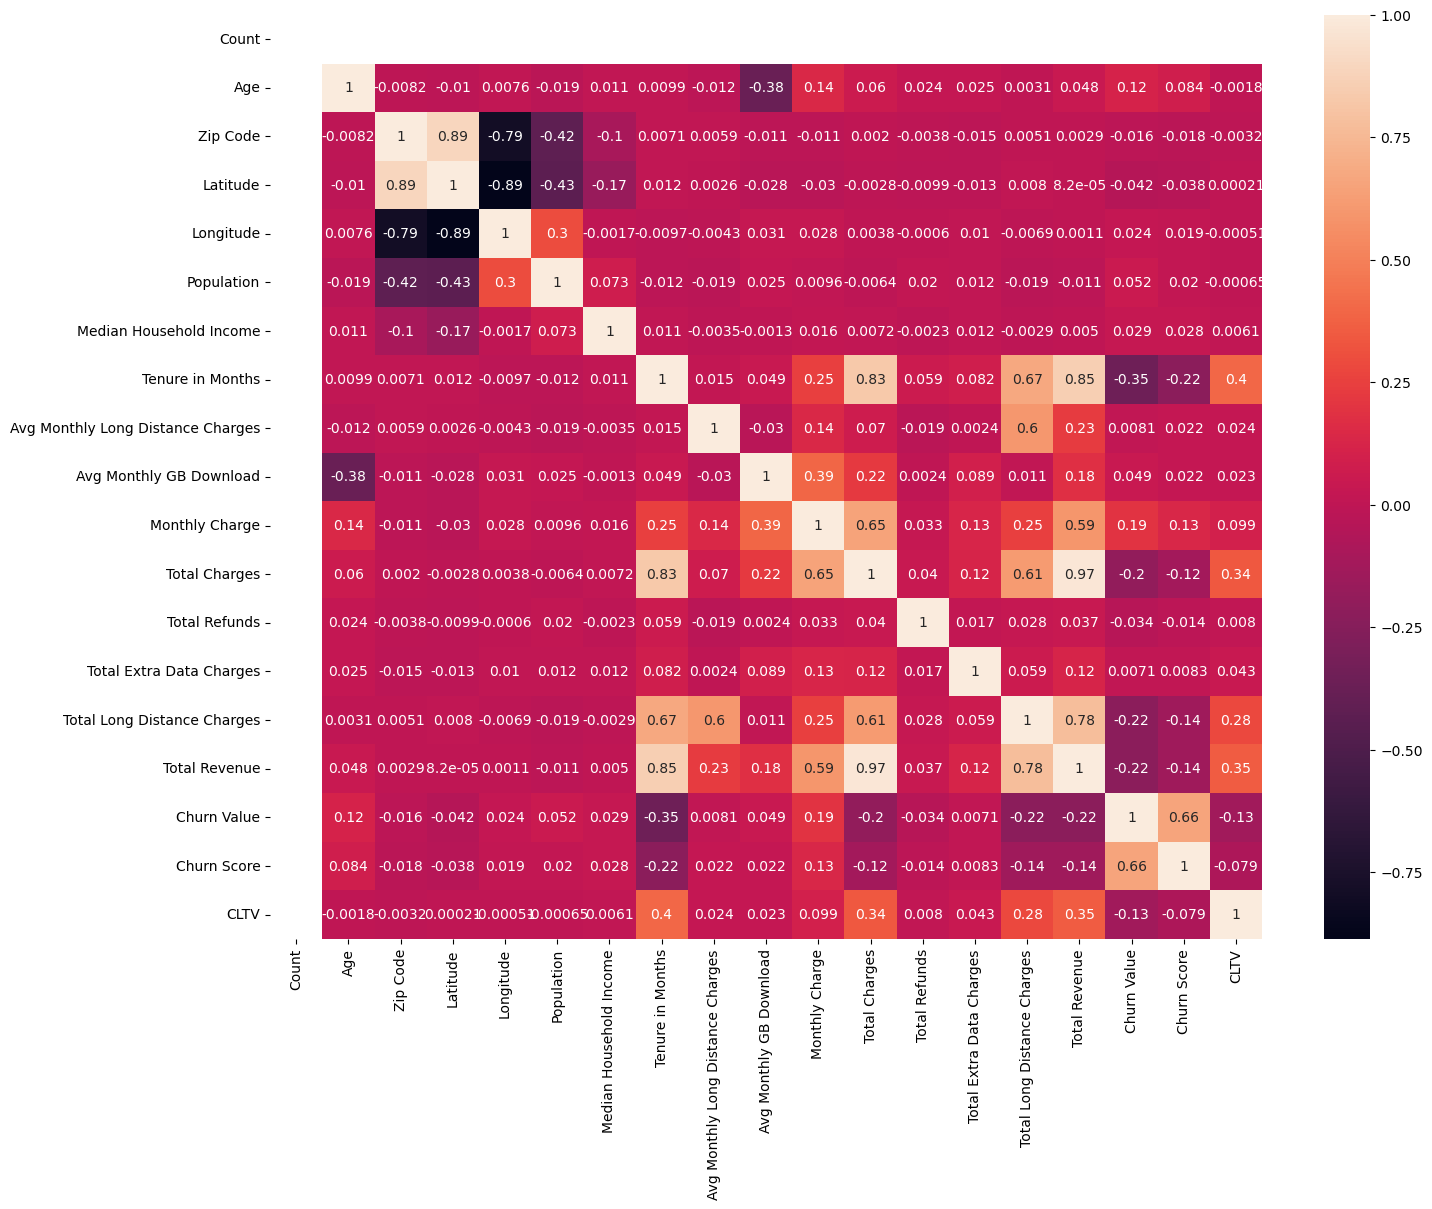

In [61]:
#Checking multiculliniliarity to identify potential columns to drop
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=numerical.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [62]:
#Columns to drop due to multiculliniliarity with others (> 0.85 or <-0.85)
#1) Keeping Latitude (has higher neg corr w/ Churn Value), and dropping ZipC and Long as they have over (+-) 0.85 with Lat
#2) Keeping Total Revenue (has higher neg corr w/ Churn Value) and dropping Total Charges as it has over +0.85 with Tot Rev


numerical = numerical.drop(['Zip Code', 'Longitude', 'Total Charges'], axis=1)

### `Preparing for model`

In [63]:
#Concatenating categorical and numerical
churn = pd.concat([numerical, categorical], axis=1)
churn

,Count,Age,Latitude,Population,Median Household Income,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Value,Churn Score,CLTV,Gender,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Referred a Friend,Number of Referrals,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Satisfaction Score
0,1,78,34.023810,68701,39051.0,1,0.00,8,39.65,0.0,20,0.00,59.65,1,91,5433,Male,0,1,0,0,0,Los Angeles,0,0,None,0,0,1,DSL,0,0,1,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,3
1,1,39,34.023810,68701,39051.0,72,42.55,18,72.10,0.0,0,3063.60,8080.25,0,42,4658,Male,0,0,1,0,0,Los Angeles,1,5,None,1,1,1,DSL,1,1,1,1,0,0,0,1,Two Year,0,Credit Card,3
2,1,32,34.023810,68701,39051.0,1,7.11,26,75.55,0.0,0,7.11,82.66,0,34,3503,Female,0,0,0,0,0,Los Angeles,0,0,None,1,0,1,Fiber Optic,0,0,1,0,0,0,0,1,Month-to-Month,0,Bank Withdrawal,5
3,1,35,34.023810,68701,39051.0,66,0.00,25,56.75,0.0,0,0.00,3708.40,0,46,5748,Male,0,0,1,1,>=3,Los Angeles,1,4,None,0,0,1,Cable,0,1,1,0,1,1,1,1,Two Year,1,Credit Card,3
4,1,20,34.023810,68701,39051.0,7,36.49,42,94.05,0.0,0,255.43,888.88,0,38,5545,Female,1,0,0,0,0,Los Angeles,0,0,Offer E,1,0,1,Fiber Optic,0,1,0,0,1,1,1,1,One Year,1,Credit Card,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,21,32.649787,699,45625.0,1,16.06,59,53.55,0.0,0,16.06,69.61,0,62,4504,Female,1,0,1,0,0,Jacumba,1,6,Offer E,1,0,1,DSL,1,1,0,0,0,0,1,1,Month-to-Month,1,Credit Card,4
7039,1,36,32.741859,73006,36893.0,67,23.13,24,109.90,0.0,0,1549.71,8882.11,0,26,5416,Male,0,0,1,0,0,San Diego,1,1,None,1,1,1,Fiber Optic,1,1,1,0,1,1,1,1,One Year,0,Credit Card,4
7040,1,32,32.741859,73006,36893.0,9,23.42,30,102.60,0.0,0,210.78,1108.53,0,32,4062,Male,0,0,1,1,>=3,San Diego,1,8,Offer E,1,1,1,Fiber Optic,0,1,1,0,1,1,1,1,Month-to-Month,1,Credit Card,5
7041,1,62,32.811001,8062,43264.0,26,37.69,30,84.30,0.0,0,979.94,3261.54,0,66,5471,Male,0,0,0,0,0,Holtville,0,0,None,1,1,1,Fiber Optic,0,0,1,1,0,0,0,1,Month-to-Month,1,Credit Card,5


In [64]:
#Defining X and y
X = churn.drop(['Churn Value'] ,axis=1)
display(X)
y = churn['Churn Value']
display(y)

,Count,Age,Latitude,Population,Median Household Income,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Score,CLTV,Gender,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Referred a Friend,Number of Referrals,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Satisfaction Score
0,1,78,34.023810,68701,39051.0,1,0.00,8,39.65,0.0,20,0.00,59.65,91,5433,Male,0,1,0,0,0,Los Angeles,0,0,None,0,0,1,DSL,0,0,1,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,3
1,1,39,34.023810,68701,39051.0,72,42.55,18,72.10,0.0,0,3063.60,8080.25,42,4658,Male,0,0,1,0,0,Los Angeles,1,5,None,1,1,1,DSL,1,1,1,1,0,0,0,1,Two Year,0,Credit Card,3
2,1,32,34.023810,68701,39051.0,1,7.11,26,75.55,0.0,0,7.11,82.66,34,3503,Female,0,0,0,0,0,Los Angeles,0,0,None,1,0,1,Fiber Optic,0,0,1,0,0,0,0,1,Month-to-Month,0,Bank Withdrawal,5
3,1,35,34.023810,68701,39051.0,66,0.00,25,56.75,0.0,0,0.00,3708.40,46,5748,Male,0,0,1,1,>=3,Los Angeles,1,4,None,0,0,1,Cable,0,1,1,0,1,1,1,1,Two Year,1,Credit Card,3
4,1,20,34.023810,68701,39051.0,7,36.49,42,94.05,0.0,0,255.43,888.88,38,5545,Female,1,0,0,0,0,Los Angeles,0,0,Offer E,1,0,1,Fiber Optic,0,1,0,0,1,1,1,1,One Year,1,Credit Card,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,21,32.649787,699,45625.0,1,16.06,59,53.55,0.0,0,16.06,69.61,62,4504,Female,1,0,1,0,0,Jacumba,1,6,Offer E,1,0,1,DSL,1,1,0,0,0,0,1,1,Month-to-Month,1,Credit Card,4
7039,1,36,32.741859,73006,36893.0,67,23.13,24,109.90,0.0,0,1549.71,8882.11,26,5416,Male,0,0,1,0,0,San Diego,1,1,None,1,1,1,Fiber Optic,1,1,1,0,1,1,1,1,One Year,0,Credit Card,4
7040,1,32,32.741859,73006,36893.0,9,23.42,30,102.60,0.0,0,210.78,1108.53,32,4062,Male,0,0,1,1,>=3,San Diego,1,8,Offer E,1,1,1,Fiber Optic,0,1,1,0,1,1,1,1,Month-to-Month,1,Credit Card,5
7041,1,62,32.811001,8062,43264.0,26,37.69,30,84.30,0.0,0,979.94,3261.54,66,5471,Male,0,0,0,0,0,Holtville,0,0,None,1,1,1,Fiber Optic,0,0,1,1,0,0,0,1,Month-to-Month,1,Credit Card,5


0       1
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Value, Length: 7043, dtype: int64

In [65]:
#Splitting the data into a training set and a test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Separating X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat = X_test.select_dtypes(include = object)

# Scaling data for train data. Transforming BOTH X_train_num and X_test_num

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num) # ONLY fitting TRAIN
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

# Scaling data for test data

X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm

#OneHotEncoding for train data (categoricals). Encoding first train data

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_train_cat_encoded

#OneHotEncoding for test data

X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

#And before creating the models, we concatenate the data frames transformed into an array
# X_train_transformed = np.concatenate([X_train_norm, X_train_cat_encoded], axis=1)

X_train_transformed = pd.concat([X_train_norm, X_train_cat_encoded], axis=1)
X_train_transformed

#Concatenating test data
# X_test_transformed = np.concatenate([X_test_norm,X_test_cat_encoded], axis=1)

X_test_transformed  = pd.concat([X_test_norm,X_test_cat_encoded], axis=1)
X_test_transformed

# Resetting index for y (needed because the transformation resetted the index for X_train and X_test_transformed)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

C:\Users\mburm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [66]:
y_train

0       1
1       0
2       0
3       0
4       0
       ..
5629    0
5630    0
5631    1
5632    0
5633    0
Name: Churn Value, Length: 5634, dtype: int64

In [67]:
X_train_transformed

Count       Age  Latitude  Population  Median Household Income  \
0       0.0  0.852459  0.142595    0.525248                 0.160623   
1       0.0  0.098361  0.124645    0.001548                 0.433018   
2       0.0  0.606557  0.151137    0.171429                 0.419375   
3       0.0  0.032787  0.748663    0.013707                 0.195932   
4       0.0  0.803279  0.548284    0.118310                 0.287337   
...     ...       ...       ...         ...                      ...   
5629    0.0  0.655738  0.683325    0.014391                 0.273477   
5630    0.0  0.245902  0.253040    0.054287                 0.166738   
5631    0.0  0.540984  0.170198    0.175798                 0.318591   
5632    0.0  0.131148  0.442609    0.029779                 0.244597   
5633    0.0  0.360656  0.140773    0.328486                 0.219510   

      Tenure in Months  Avg Monthly Long Distance Charges  \
0             0.000000                           0.850170   
1             0.774648                           0.146229   
2             0.577465                           0.405481   
3             0.816901                           0.000000   
4             0.915493                           0.209042   
...                ...                                ...   
5629          0.521127                           0.629126   
5630          0.915493                           0.962392   
5631          0.000000                           0.438288   
5632          0.549296                           0.000000   
5633          0.929577                           0.064013   

      Avg Monthly GB Download  Monthly Charge  Total Refunds  \
0                    0.094118        0.664179            0.0   
1                    0.894118        0.502488            0.0   
2                    0.176471        0.599005            0.0   
3                    0.623529        0.259204            0.0   
4                    0.235294        0.837313            0.0   
...                       ...             ...            ...   
5629                 0.894118        0.555224            0.0   
5630                 0.317647        0.309950            0.0   
5631                 0.094118        0.561692            0.0   
5632                 0.611765        0.324378            0.0   
5633                 0.270588        0.675622            0.0   

      Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                     0.000000                     0.011922       0.008876   
1                     0.733333                     0.114837       0.360713   
2                     0.000000                     0.238824       0.351513   
3                     0.133333                     0.000000       0.222896   
4                     0.000000                     0.193479       0.597107   
...                        ...                          ...            ...   
5629                  0.000000                     0.335258       0.332501   
5630                  0.000000                     0.890746       0.535688   
5631                  0.000000                     0.006146       0.006293   
5632                  0.000000                     0.000000       0.168523   
5633                  0.000000                     0.060145       0.508187   

      Churn Score      CLTV  Gender_Male  Under 30_1  Senior Citizen_1  \
0        0.967033  0.143906          0.0         0.0               1.0   
1        0.527473  0.998888          0.0         1.0               0.0   
2        0.274725  0.264457          0.0         0.0               0.0   
3        0.252747  0.867883          1.0         1.0               0.0   
4        0.703297  0.635676          0.0         0.0               1.0   
...           ...       ...          ...         ...               ...   
5629     0.593407  0.883452          1.0         0.0               0.0   
5630     0.593407  0.718194          0.0         0.0               0.0   
5631     0.824176  0.884564         

### `Prediction model: predicting who will churn or not`

In [68]:
#Importing each classifier model and storing them by name in a dictionary:

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

In [69]:
#Now we will loop over each one, fit it, make predictions, and calculate metrics (storing each result in a dictionary)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

accuracy = {}
precision = {}
recall = {}
f1= {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train_transformed, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test_transformed)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = recall_score(predictions, y_test)
    
    #Build confusion matrixes
#     cm = confusion_matrix(y_test,predictions)
#     cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[key].classes_)
#     cm_display.plot()
    print('Confusion matrix: ',key)
    print(confusion_matrix(y_test,predictions))
    print('      ')

Confusion matrix:  Logistic Regression
[[1041    7]
 [  16  345]]
      
Confusion matrix:  K-Nearest Neighbor
[[965  83]
 [ 45 316]]
      
Confusion matrix:  Decision Trees
[[1028   20]
 [  12  349]]
      
Confusion matrix:  Random Forest
[[1042    6]
 [  47  314]]
      
Confusion matrix:  Support Vector Machines
[[1036   12]
 [  13  348]]
      
Confusion matrix:  Naive Bayes
[[744 304]
 [ 73 288]]
      


In [70]:
#Now we will check results in a table
binary_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
binary_model['Accuracy'] = accuracy.values()
binary_model['Precision'] = precision.values()
binary_model['Recall'] = recall.values()
binary_model['F1'] = f1.values()
binary_model

,Accuracy,Precision,Recall,F1
Logistic Regression,0.983676,0.955679,0.980114,0.980114
K-Nearest Neighbor,0.909155,0.875346,0.791980,0.791980
Decision Trees,0.977289,0.966759,0.945799,0.945799
Random Forest,0.962385,0.869806,0.981250,0.981250
Support Vector Machines,0.982257,0.963989,0.966667,0.966667
Naive Bayes,0.732434,0.797784,0.486486,0.486486


### `Prediction model: predicting who is likely to churn (Churn score)`

In [71]:
#Defining X and y
#Should I only add those who stay in this piece?
X = churn.drop(['Churn Score'] ,axis=1)
display(X)
y = churn['Churn Score']
display(y)

,Count,Age,Latitude,Population,Median Household Income,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Value,CLTV,Gender,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Referred a Friend,Number of Referrals,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Satisfaction Score
0,1,78,34.023810,68701,39051.0,1,0.00,8,39.65,0.0,20,0.00,59.65,1,5433,Male,0,1,0,0,0,Los Angeles,0,0,None,0,0,1,DSL,0,0,1,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,3
1,1,39,34.023810,68701,39051.0,72,42.55,18,72.10,0.0,0,3063.60,8080.25,0,4658,Male,0,0,1,0,0,Los Angeles,1,5,None,1,1,1,DSL,1,1,1,1,0,0,0,1,Two Year,0,Credit Card,3
2,1,32,34.023810,68701,39051.0,1,7.11,26,75.55,0.0,0,7.11,82.66,0,3503,Female,0,0,0,0,0,Los Angeles,0,0,None,1,0,1,Fiber Optic,0,0,1,0,0,0,0,1,Month-to-Month,0,Bank Withdrawal,5
3,1,35,34.023810,68701,39051.0,66,0.00,25,56.75,0.0,0,0.00,3708.40,0,5748,Male,0,0,1,1,>=3,Los Angeles,1,4,None,0,0,1,Cable,0,1,1,0,1,1,1,1,Two Year,1,Credit Card,3
4,1,20,34.023810,68701,39051.0,7,36.49,42,94.05,0.0,0,255.43,888.88,0,5545,Female,1,0,0,0,0,Los Angeles,0,0,Offer E,1,0,1,Fiber Optic,0,1,0,0,1,1,1,1,One Year,1,Credit Card,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,21,32.649787,699,45625.0,1,16.06,59,53.55,0.0,0,16.06,69.61,0,4504,Female,1,0,1,0,0,Jacumba,1,6,Offer E,1,0,1,DSL,1,1,0,0,0,0,1,1,Month-to-Month,1,Credit Card,4
7039,1,36,32.741859,73006,36893.0,67,23.13,24,109.90,0.0,0,1549.71,8882.11,0,5416,Male,0,0,1,0,0,San Diego,1,1,None,1,1,1,Fiber Optic,1,1,1,0,1,1,1,1,One Year,0,Credit Card,4
7040,1,32,32.741859,73006,36893.0,9,23.42,30,102.60,0.0,0,210.78,1108.53,0,4062,Male,0,0,1,1,>=3,San Diego,1,8,Offer E,1,1,1,Fiber Optic,0,1,1,0,1,1,1,1,Month-to-Month,1,Credit Card,5
7041,1,62,32.811001,8062,43264.0,26,37.69,30,84.30,0.0,0,979.94,3261.54,0,5471,Male,0,0,0,0,0,Holtville,0,0,None,1,1,1,Fiber Optic,0,0,1,1,0,0,0,1,Month-to-Month,1,Credit Card,5


0       91
1       42
2       34
3       46
4       38
        ..
7038    62
7039    26
7040    32
7041    66
7042    22
Name: Churn Score, Length: 7043, dtype: int64

In [72]:
#Splitting the data into a training set and a test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Separating X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat = X_test.select_dtypes(include = object)

# Scaling data for train data. Transforming BOTH X_train_num and X_test_num

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num) # ONLY fitting TRAIN
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

# Scaling data for test data

X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm

#OneHotEncoding for train data (categoricals). Encoding first train data

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_train_cat_encoded

#OneHotEncoding for test data

X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

#And before creating the models, we concatenate the data frames transformed into an array
X_train_transformed = np.concatenate([X_train_norm, X_train_cat_encoded], axis=1)

# X_train_transformed = pd.concat([X_train_norm, X_train_cat_encoded], axis=1)
# X_train_transformed

#Concatenating test data
X_test_transformed = np.concatenate([X_test_norm,X_test_cat_encoded], axis=1)

# X_test_transformed  = pd.concat([X_test_norm,X_test_cat_encoded], axis=1)
# X_test_transformed

# Resetting index for y (needed because the transformation resetted the index for X_train and X_test_transformed)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

C:\Users\mburm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [73]:
#Importing each classifier model and storing them by name in a dictionary:

models = {}

# Linear Regression
from sklearn.linear_model import LinearRegression
models['Linear Regression'] = LinearRegression()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
models['K-Nearest Neighbor Regressor'] = KNeighborsRegressor()

# Decision Trees
from sklearn.tree import DecisionTreeRegressor
models['Decision Trees Regressor'] = DecisionTreeRegressor()

# Random Forest
from sklearn.ensemble import RandomForestRegressor
models['Random Forest'] = RandomForestRegressor()

# Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
models['Stochastic Gradient Descent'] = SGDRegressor()

# Multi-layer Perceptron
from sklearn.neural_network import MLPRegressor
models['Multi-layer Perceptron'] = MLPRegressor()

In [74]:
#Now we will loop over each one, fit it, make predictions, and calculate metrics (storing each result in a dictionary)
from sklearn.metrics import mean_squared_error, r2_score

r2_train = {}
mse_train = {}
rmse_train = {}

r2_test = {}
mse_test = {}
rmse_test = {}

for key in models.keys():
    
    # Fitting the regressor
    models[key].fit(X_train_transformed, y_train)
    
    # Making predictions for train data
    pred = models[key].predict(X_train_transformed)
    
    # Calculating metrics from train data
    r2_train[key] = r2_score(y_train, pred)
    mse_train[key] = mean_squared_error(y_train, pred)
    rmse_train[key] = np.sqrt(mean_squared_error(y_train, pred))
    
    # Making predictions for test data
    predictions = models[key].predict(X_test_transformed)
    
    # Calculating metrics from test data
    r2_test[key] = r2_score(y_test, predictions)
    mse_test[key] = mean_squared_error(y_test, predictions)
    rmse_test[key] = np.sqrt(mean_squared_error(y_test, predictions))

C:\Users\mburm\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [75]:
#Now we will check results in a table
regressor_model = pd.DataFrame(index=models.keys(), columns=['R2 Score', 'MSE', 'RMSE'])
regressor_model['R2 Score'] = r2_train.values()
regressor_model['MSE'] = mse_train.values()
regressor_model['RMSE'] = rmse_train.values()
print('RESULTS TRAIN DATA')
regressor_model

RESULTS TRAIN DATA


,R2 Score,MSE,RMSE
Linear Regression,0.552663,200.278384,14.151975
K-Nearest Neighbor Regressor,0.526659,211.920554,14.557491
Decision Trees Regressor,1.000000,0.000000,0.000000
Random Forest,0.918120,36.658547,6.054630
Stochastic Gradient Descent,0.487408,229.493856,15.149055
Multi-layer Perceptron,0.838173,72.452151,8.511883


In [76]:
#Now we will check results in a table
regressor_model = pd.DataFrame(index=models.keys(), columns=['R2 Score', 'MSE', 'RMSE'])
regressor_model['R2 Score'] = r2_test.values()
regressor_model['MSE'] = mse_test.values()
regressor_model['RMSE'] = rmse_test.values()
print('RESULTS TEST DATA')
regressor_model

RESULTS TEST DATA


,R2 Score,MSE,RMSE
Linear Regression,0.271457,327.611969,18.100054
K-Nearest Neighbor Regressor,0.310789,309.925195,17.604692
Decision Trees Regressor,-0.094707,492.268985,22.187136
Random Forest,0.423510,259.236892,16.100835
Stochastic Gradient Descent,0.440741,251.488433,15.858387
Multi-layer Perceptron,0.211028,354.785610,18.835753
